# Wine Quality
*Team Members: Caroline Miller, Aaron Moore*


## Imports

In [1]:
# getting imports
from wrangle_wine import merge_wine, wrangle_wine

import stats_wine as sw
import explore as e
from explore import quality_dis
import modeling

## Acquire

* Acquired two datasets from data.world on 2023-04-14
* Saved the dataset as csv files and merged them 
* After merging:
    * Observations: 6,497 wines on file
    * Features: 13 features representing different wine characteristics

In [2]:
# Import acquired messy data from your acquire file here
df = merge_wine()

In [3]:
# getting sample
df.sample(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_or_white
1289,7.0,0.6,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2,5,red
3313,6.8,0.3,0.24,6.6,0.123,35.0,116.0,0.99530,3.07,0.48,9.4,5,white


## Prepare

* Removed outliers using the IQR * 1.5 method
* No null values were present
* Changed names to be python friendly
* Encoded and scaled data
* Split data into train, validate, test

In [4]:
# importing wrangled data
train, validate, test,\
train_scaled, validate_scaled, test_scaled = wrangle_wine()

## Explore 

### 1) What is the distribution of the wine quality?

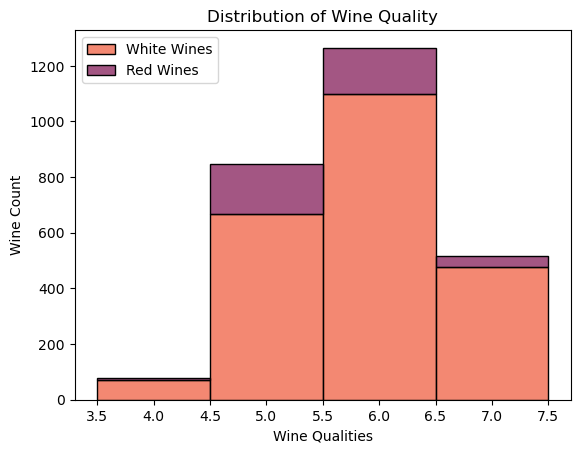

In [6]:
# get plot
quality_dis(train)

##### Takeaways:
* The majority of the wines are white wines
* The majority of the wines have a quality rating 6
* There are more higher quality wines than lower quality

### 2) What is the relationship between wine quality and volatile acidity?

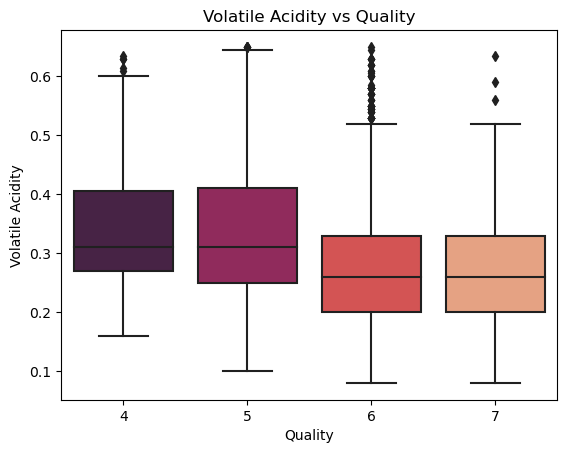

In [8]:
# get visualization
e.volatile_acidity_vis(train)

##### Takeaways:
* The higher quality wines have lower volatile acidities and the lower quality of wines have higher volatile acidities

#### Statistical Testing
##### Levene Test :
>- H$_0$: Higher quality wines volatile acidity and lower quality wines volatile acidity have equal variance.
>- H$_a$: Higher quality wines volatile acidity and lower quality wines volatile acidity do **not** have equal variance.
>- Confidence Interval: 95%
>- $a$: 0.05

In [9]:
# get stats results
sw.get_va_lv()

We can reject the null hypothesis with a p-value of 1.459186755356841e-09


##### Mann-Whitney:
>- H$_0$: There is no difference between higher quality wines volatile acid and lower quality wines volatile acidity
>- H$_a$: There is a difference between higher quality wines volatile acidity and lower quality wines volatile acidity
>- Confidence Interval: 95%
>- $a$: 0.05

In [10]:
# get stats results
sw.get_va_mw()

We can reject the null hypothesis with a p-value of 1.4681458726460203e-40


Based on the stastitical testing, there appears to be noteworthy differences between the volatile acidity of higher quality wines and lower quality wines.

### 3) What is the relationship between wine quality and alcohol? 

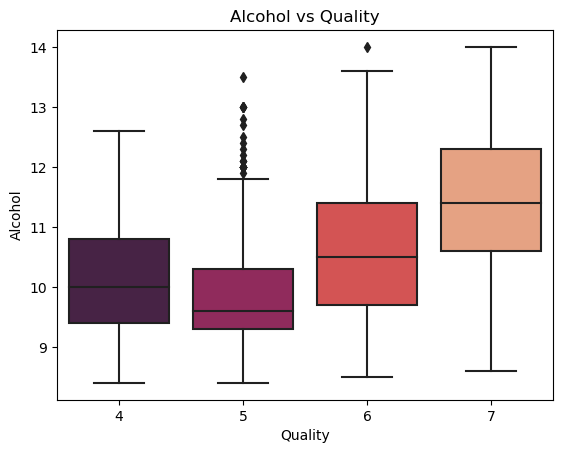

In [11]:
# get visuals
e.alcohol_vis(train)

##### Takeaways:
* The higher quality wines have higher alcohol content and the lower quality wines have lower alcohol content

#### Statistical Testing
##### Levene Test:
>- H$_0$: Higher quality wines alcohol and lower quality wines alcohol have equal variance.
>- H$_a$: Higher quality wines alcohol and lower quality wines alcohol do **not** have equal variance.
>- Confidence Interval: 95%
>- $a$: 0.05

In [12]:
# gettiing stats results
sw.get_alcohol_lv()

We can reject the null hypothesis with a p-value of 3.169462244506217e-45


##### Mann-Whitney:
>- H$_0$: There is no difference between higher quality wines alcohol and lower quality wines alcohol
>- H$_a$: There is a difference between higher quality wines alcohol and lower quality wines alcohol
>- Confidence Interval: 95%
>- $a$: 0.05

In [13]:
# getting stats results
sw.get_alcohol_mw()

We can reject the null hypothesis with a p-value of 3.1240584154670644e-95


Based on the stastitical testing, there appears to be noteworthy differences between the alcohol content of higher quality wines and lower quality wines.

### 4) What is the relationship between wine quality and density?

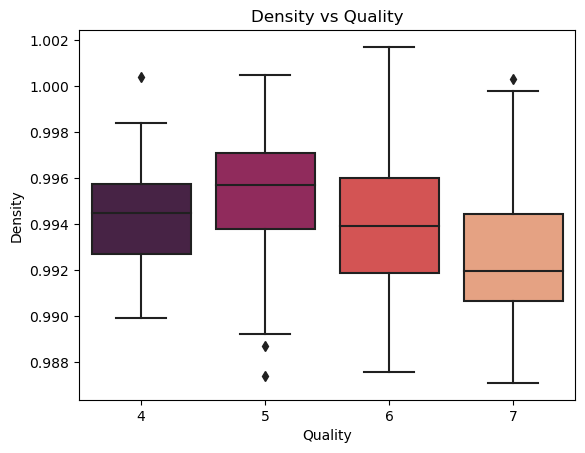

In [14]:
# visualization
e.density_vis(train)

##### Takeaways:
* Higher quality wines have lower desnities and lower quality wines have densities in the mid to higher range

#### Statistical Testing
##### Levene Test:
>- H$_0$: Higher quality wines' density and lower quality wines' density have equal variance.
>- H$_a$: Higher quality wines density' and lower quality wines' density do **not** have equal variance.
>- Confidence Interval: 95%
>- $a$: 0.05

In [15]:
# getting stats results
sw.get_density_lv()

We can reject the null hypothesis with a p-value of 1.2756207455735509e-15


##### Mann-Whitney:
>- H$_0$: There is no difference between higher quality wines density and lower quality wines density
>- H$_a$: There is a difference between higher quality wines density and lower quality wines density
>- Confidence Interval: 95%
>- $a$: 0.05

In [16]:
# getting stats results
sw.get_density_mw()

We can reject the null hypothesis with a p-value of 1.2478925168718082e-51


Based on the stastitical testing, there appears to be noteworthy differences between the density of higher quality wines and lower quality wines.

### 5) What is the relationship between wine quality and chlorides?

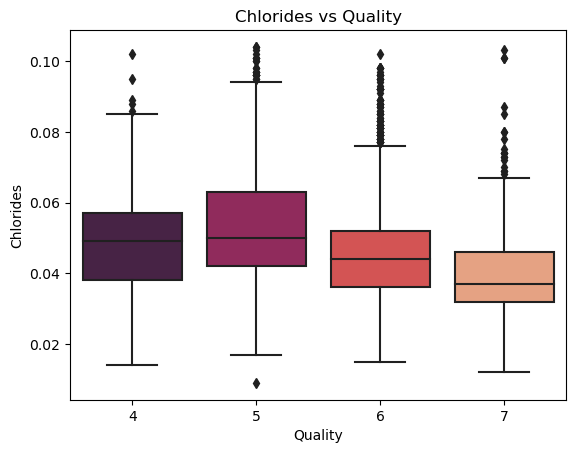

In [17]:
# get visual
e.chlorides_vis(train)

##### Takeaways:
* Higher quality wines have lower levels and lower qualities have higher levels of chlorides

#### Statistical Testing
##### Levene Test:
>- H$_0$: Higher quality wines' chlorides and lower quality wines' chlorides have equal variance.
>- H$_a$: Higher quality wines' chlorides and lower quality wines' chlorides do **not** have equal variance.
>- Confidence Interval: 95%
>- $a$: 0.05

In [18]:
# getting stats results
sw.get_chlorides_lv()

We can reject the null hypothesis with a p-value of 3.890765888691501e-05


##### Mann-Whitney:
>- H$_0$: There is no difference between higher quality wines chlorides and lower quality wines chlorides
>- H$_a$: There is a difference between higher quality wines chlorides and lower quality wines chlorides
>- Confidence Interval: 95%
>- $a$: 0.05

In [19]:
# getting stats results
sw.get_chlorides_mw()

We can reject the null hypothesis with a p-value of 6.904700790278716e-42


Based on the stastitical testing, there appears to be noteworthy differences between the chloride content of higher quality wines and lower quality wines.

## Exploration Summary
There are statistically significant differences between the average chloride content, density, alcohol content, and volatile acidity of high quality wines and low quality wines

* Features for modeling:
    * Fixed acidity
    * Volatile acidity
    * Citric acid
    * Residual sugar
    * Chlorides
    * Free sulfur dioxide
    * Density
    * pH
    * Sulphates
    * Alcohol
    * White wine

## Modeling

### Introduction

* The evaluation metric used to determine the best model is accuracy.

* The overall picture of how often the model was correct in its prediction is paramount in this project because none of the 4 possible outcomes is of greater interest than the rest; we are interested in the model's ability to correctly predict all four of the possible outcomes. 

* For the classification models, the baseline predictions are equivalient to the mode outcome, which in this case is a quality rating of six.

* For the Linear Regression models, the baseline predictions are equivalent to the mean rounded to an integer value because the quality ratings are whole numbers; in this case, the baseline also is six. 

Clustering was conducted through two methods: 1) datasets which included clusters, and 2) datasets which did not include clusters.

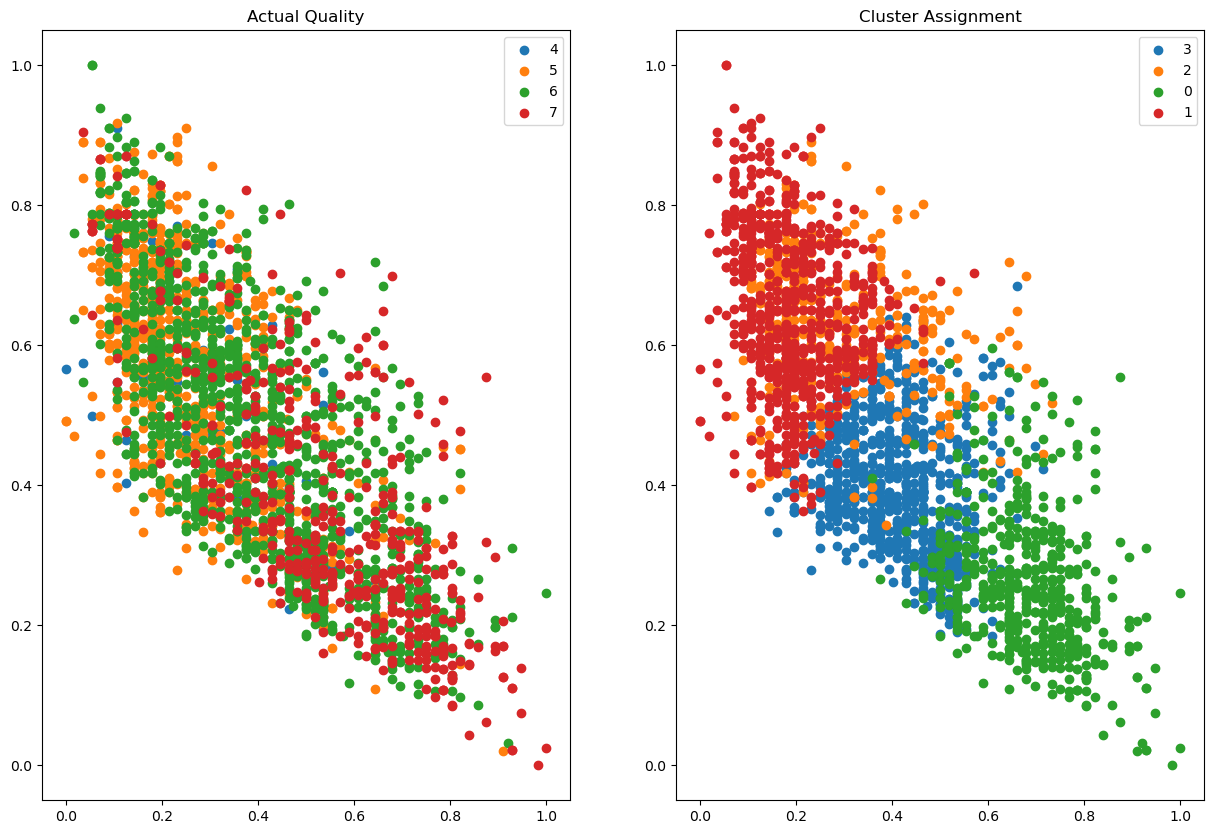

In [20]:
# get modeling visual
modeling.clustering_viz()

#### Clustering

The most valuable number of centroids found through Clustering models matched the number of possible outcomes:  4. 

Using a K value of 4, a subset was used to generate the clusters which included the following features:

    - alcohol
    - density 
    - chlorides 
    - volatile_acidity
    
These features were chosen because they proved to have a linear relationship with the qualty of wine. 

**Classifcation Models and Linear Rregression Models**

In [21]:
# Evaluation Metrics of Classification Models with clusters as features
modeling.classification_eval_dict()

,train_score,validate_score,difference
Baseline,0.467,0.467,0.000
DecisionTreeClassifier(max_depth=12),0.905,0.596,0.310
"RandomForestClassifier(=4, min_samples_leaf=7)",0.605,0.554,0.051
Logistic Regression,0.570,0.549,0.021
KNeighborsClassifier(n_neighbors=6),0.693,0.426,0.267


In [22]:
# Evaluation Metrics of Linear Regression Models with clusters as features
modeling.regression_eval_dict()

,RMSE_train,RMSE_validate,R2_validate
Baseline,0.786,0.785,0.000
OLS_Regressor,0.707,0.723,0.107
LassoLars(alpha=1),0.786,0.785,0.000
"TweetieRegressor_GLM(power=1, alpha=0)",0.707,0.724,0.106
Polynomial_Regression,0.679,0.714,0.127


Comparison with Models without Clusters

    - The model without clusters as features which performed the best was a Random Forest Classifier with a max depth of 4. 
    
    - The accuracy score of this model was 0.610
    
    - The models without the clusters as features actually performed better than the models which used the clusters as features
    
    - Note:  It first appears that the Linear Regression models performed the best. Through further exploration, the predictions of these models closely if not identically reflected the baseline predictions. Because of this, it was determined that Linear Regression modeling was an inapprpriate methodology to classify such discrete outcomes as wine quality target.

**Testing the Best Model**

In [25]:
# Random Forest Classifier with a max depth of 4 and no clusters as features
modeling.test_best_model()

Accuracy score on test dataset: 0.5314384151593454


### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production

## Conclusion

### Summery
* Summarize your findings and answer the questions you brought up in explore 
* Summarize how drivers discovered lead or did not lead to a successful model 

### Recommendations
* Recommendations are actions the stakeholder should take based on your insights

### Next Steps
* Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project